In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit,KFold,GridSearchCV
from sklearn.metrics import accuracy_score,fbeta_score,f1_score
import numpy as np
import matplotlib.pyplot as plt
from helpers import make_complexity_curve, make_learning_curve,make_timing_curve,make_timing_curve_fixed, plot_result,make_timing_curve_from_param
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.metrics import euclidean_distances
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import SGDClassifier
from sklearn.utils.multiclass import unique_labels
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

**Load Cleaned Adult Data**

In [2]:
adult_df = pd.read_csv(filepath_or_buffer="adult_cleaned.csv")
adult_df_dummies = pd.get_dummies(adult_df.drop('target', 1))
adult_x = adult_df_dummies.copy().values
adult_y = adult_df["target"].copy().values
X_adult_train, X_adult_test, y_adult_train, y_adult_test = train_test_split(adult_x, adult_y, test_size=0.2,random_state=0)
print(f"adult_df: {adult_df.shape}")
print(f"X_adult_train: {X_adult_train.shape}")
print(f"X_adult_test: {X_adult_test.shape}")
print(f"y_adult_train: {y_adult_train.shape}")
print(f"y_adult_test: {y_adult_test.shape}")
print(f"y_adult_train pos: {(y_adult_train > 0).sum() / len(y_adult_train)}")
print(f"y_adult_train neg: {(y_adult_train == 0).sum() / len(y_adult_train)}")
pipeAdult = Pipeline([('Scale',StandardScaler())])
X_trans_adult_train = pipeAdult.fit_transform(X_adult_train, y_adult_train)
print(f"X_trans_adult_train: {X_trans_adult_train.shape}")

adult_df: (30162, 13)
X_adult_train: (24129, 70)
X_adult_test: (6033, 70)
y_adult_train: (24129,)
y_adult_test: (6033,)
y_adult_train pos: 0.2489535413817398
y_adult_train neg: 0.7510464586182601
X_trans_adult_train: (24129, 70)


**Load Spam**

In [3]:
spam_df = pd.read_csv('spambase.csv', header=0)
spam_x = spam_df.drop('class', axis=1).copy().values
spam_y = spam_df['class'].copy().values
X_spam_train, X_spam_test, y_spam_train, y_spam_test = train_test_split(spam_x, spam_y, test_size=0.2,random_state=0)
print(f"spam_df: {spam_df.shape}")
print(f"X_spam_train: {X_spam_train.shape}")
print(f"X_spam_test: {X_spam_test.shape}")
print(f"y_spam_train: {y_spam_train.shape}")
print(f"y_spam_test: {y_spam_test.shape}")
print(f"y_spam_train pos: {(y_spam_train > 0).sum() / len(y_spam_train)}")
print(f"y_spam_train neg: {(y_spam_train == 0).sum() / len(y_spam_train)}")
pipeSpam = Pipeline([('Scale',StandardScaler())])
X_trans_spam_train = pipeSpam.fit_transform(X_spam_train, y_spam_train)
print(f"X_tran_spam_train: {X_trans_spam_train.shape}")

spam_df: (4601, 58)
X_spam_train: (3680, 57)
X_spam_test: (921, 57)
y_spam_train: (3680,)
y_spam_test: (921,)
y_spam_train pos: 0.38858695652173914
y_spam_train neg: 0.6114130434782609
X_tran_spam_train: (3680, 57)


In [4]:
params = {'kernel': ['rbf'], 'gamma': [10**-2,10**-1,10**0,10**1,10**2],'C': [10**-2,10**-1,10**0,10**1,10**2]}

In [5]:
adult_cv = GridSearchCV(SVC(),param_grid=params, cv=5)
adult_cv.fit(X_trans_adult_train, y_adult_train)
print(f"best params adult rbf: {adult_cv.best_params_}")

KeyboardInterrupt: 

In [ ]:
spam_cv = GridSearchCV(SVC(),param_grid=params, cv=5)
spam_cv.fit(X_trans_spam_train, y_spam_train)
print(f"best params spam rbf: {spam_cv.best_params_}")

In [19]:
linear_adult_clf = LinearSVC()
linear_spam_clf = LinearSVC()
rbf_adult_clf = SVC(kernel='rbf')
rbf_spam_clf = SVC(kernel='rbf')

In [7]:
rbf_adult_clf = SVC(kernel='rbf', C=10**-1)
rbf_adult_clf.fit(X_trans_adult_train, y_adult_train)

KeyboardInterrupt: 

In [8]:
linear_adult_c = make_complexity_curve(linear_adult_clf, X_trans_adult_train, y_adult_train, "C", [10**-3,10**-2,10**-1,10**0,10**1,10**2, 10**3],"SVC Linear", "adult")

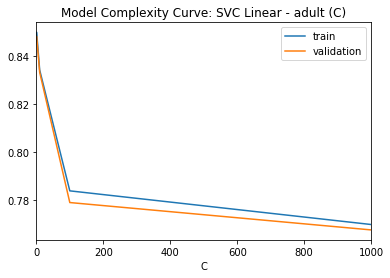

In [9]:
linear_adult_c.plot(title=linear_adult_c.name)

In [10]:
linear_spam_c = make_complexity_curve(linear_spam_clf, X_spam_train, y_spam_train, "C", [10**-3,10**-2,10**-1,10**0,10**1,10**2, 10**3],"SVC Linear", "spam")

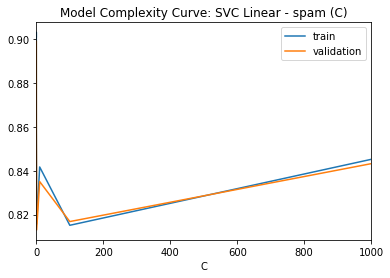

In [12]:
linear_spam_c.plot(title=linear_spam_c.name)

In [13]:
rbf_adult_c = make_complexity_curve(rbf_adult_clf, X_trans_adult_train, y_adult_train, "C", [10**-2,10**-1,10**0,10**1],"SVC rbf", "adult")

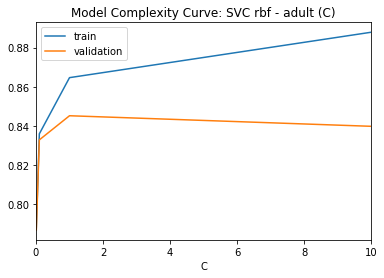

In [14]:
rbf_adult_c.plot(title=rbf_adult_c.name)

In [15]:
rbf_spam_c = make_complexity_curve(rbf_spam_clf, X_trans_spam_train, y_spam_train, "C", [10**-3,10**-2,10**-1,10**0,10**1,10**2, 10**3],"SVC rbf", "spam")

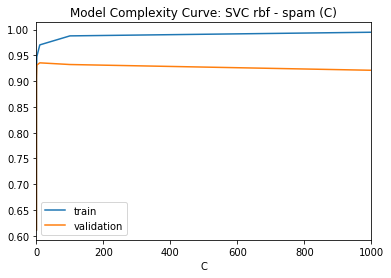

In [16]:
rbf_spam_c.plot(title=rbf_spam_c.name)

In [17]:
rbf_adult_gamma = make_complexity_curve(rbf_adult_clf, X_trans_adult_train, y_adult_train, "gamma", [10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2],"SVC rbf", "adult")

KeyboardInterrupt: 

In [ ]:
rbf_adult_gamma.head(5).plot(title=rbf_adult_gamma.name)

In [ ]:
rbf_spam_gamma = make_complexity_curve(rbf_spam_clf, X_trans_spam_train, y_spam_train, "gamma", [10**-2,10**-1,10**0,10**1,10**2],"SVC rbf", "spam")

In [ ]:
rbf_spam_gamma.plot(title=rbf_spam_gamma.name)

In [21]:
adult_clf = SVC(kernel='rbf', C=1,gamma=0.0100)
spam_clf = SVC(kernel='rbf', C=10, gamma=0.01)

**Timing Curve**

In [22]:
adult_tc = make_timing_curve(adult_clf, X_trans_adult_train, y_adult_train, 'svc', 'adult')

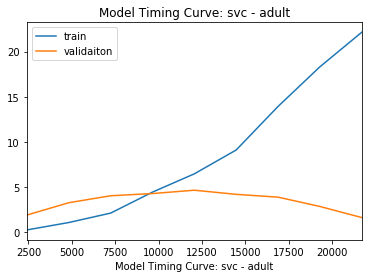

In [23]:
adult_tc.plot(title=adult_tc.name)

In [24]:
spam_tc = make_timing_curve(spam_clf, X_trans_spam_train, y_spam_train, 'svc', 'spam')

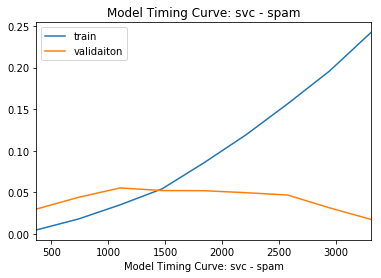

In [25]:
spam_tc.plot(title=spam_tc.name)

**Learning Curve**

In [26]:
adult_lc = make_learning_curve(adult_clf, X_trans_adult_train, y_adult_train, np.linspace(0.1, 1.0, 10),'svc', 'adult')

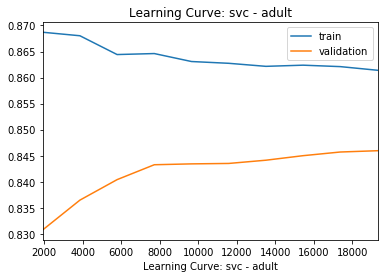

In [27]:
adult_lc.plot(title=adult_lc.name)

In [28]:
spam_lc = make_learning_curve(spam_clf, X_trans_spam_train, y_spam_train, np.linspace(0.1, 1.0, 10),'svc', 'spam')

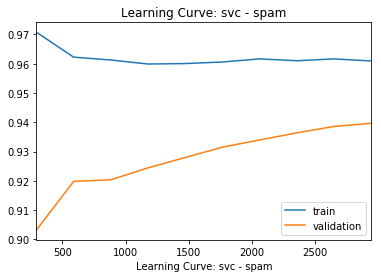

In [29]:
spam_lc.plot(title=spam_lc.name)

In [30]:
rbf_adult_clf.fit(X_trans_adult_train, y_adult_train)
rbf_spam_clf.fit(X_trans_spam_train, y_spam_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

**Train accuracy**

In [31]:
print(f"Adult train score: {adult_clf.score(pipeAdult.transform(X_adult_train), y_adult_train)}")

Adult train score: 0.8309917526627709


In [32]:
print(f"Spam train score: {spam_clf.score(pipeSpam.transform(X_spam_train), y_spam_train)}")

Spam train score: 0.9078804347826087


**Test Accuracy**

In [33]:
print(f"Adult test score: {adult_clf.score(pipeAdult.transform(X_adult_test), y_adult_test)}")

Adult test score: 0.8257914801922758


In [34]:
print(f"Spam test score: {spam_clf.score(pipeSpam.transform(X_spam_test), y_spam_test)}")

Spam test score: 0.9055374592833876
